In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
data1 = pd.read_csv("../data1.csv")
data2 = pd.read_csv("../data2.csv")
data = pd.concat([data1, data2], axis=0)
data.head()
print(data.shape, data1.shape, data2.shape)

(4800, 55) (2400, 55) (2400, 55)


[-0.033125, -0.027916666666666666, -0.02666666666666667, -0.03375]
Bias: -0.030364583333333334
[0.03203440821004376, 0.027142981176634023, 0.02596096408974092, 0.0326177328610127]
Variance: 0.029439021584357853


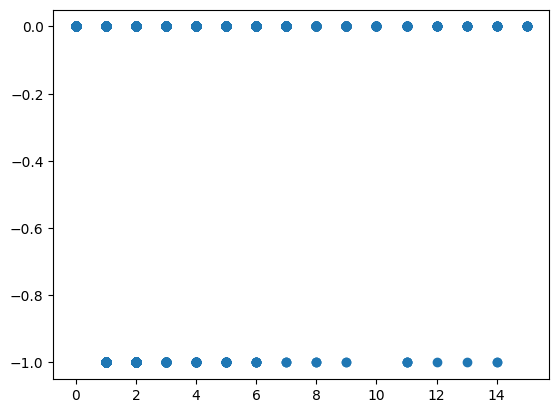

In [60]:
### Investigating the accuracy of the camera sensor
# We are going to assume the camera sensors are i.i.d estimators of the room's occupancy.
# From our initial investigation, they look to have statistically similar bias and variance.

# Camera 1 in room 3
# Camera 2 in room 21
# Camera 3 in room 25
# Camera 4 in room 34
cameras = pd.DataFrame(data[['camera1', 'r3', 'camera2', 'r21', 'camera3', 'r25', 'camera4', 'r34', 'time']])

cameras['err1'] = cameras['camera1'] - cameras['r3']
cameras['err2'] = cameras['camera2'] - cameras['r21']
cameras['err3'] = cameras['camera3'] - cameras['r25']
cameras['err4'] = cameras['camera4'] - cameras['r34']

# Slighly biased towards showing a smaller number
meanErrors = [
    cameras['err1'].mean(),
    cameras['err2'].mean(),
    cameras['err3'].mean(),
    cameras['err4'].mean(),
]
print(meanErrors)
print(f"Bias: {np.mean(meanErrors)}")

varsErrors = [
    cameras['err1'].var(),
    cameras['err2'].var(),
    cameras['err3'].var(),
    cameras['err4'].var(),
]
# Variance is fairly low.
print(varsErrors)
print(f"Variance: {np.mean(varsErrors)}")

### Question - is variance dependent on room occupancy size?
# Again, assuming that cameras are i.i.d. Join all of them into a thingo
# From the plot, doesn't look like these are correlated.
sizes = pd.Series(list(cameras['r3']) + list(cameras['r21']) + list(cameras['r25']) + list(cameras['r34']))
errors = pd.Series(list(cameras['err1']) + list(cameras['err2']) + list(cameras['err3']) + list(cameras['err4']))
sizesVsErrors = pd.DataFrame({"roomSize": sizes, "errors": errors})
plt.scatter(sizesVsErrors['roomSize'], sizesVsErrors['errors'])